In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset
dataset = pd.read_csv('Bank_Customer_Churn_dataset.csv')

# Data preprocessing
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
dataset['Gender'] = dataset['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
dataset = pd.get_dummies(dataset, columns=['Geography'], drop_first=True)
dataset['NumOfProducts'] /= 4
dataset['Tenure'] /= 10
dataset['Age'] = minmax_scale(dataset['Age'])
dataset['EstimatedSalary'] = minmax_scale(dataset['EstimatedSalary'])
dataset['Balance'] = minmax_scale(dataset['Balance'])

# Splitting the data
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
dataset = pd.read_csv('Bank_Customer_Churn_dataset.csv')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Logistic Regression:
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 


Confusion Matrix:
[[2294   85]
 [ 486  135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2379
           1       0.61      0.22      0.32       621

    accuracy                           0.81      3000
   macro avg       0.72      0.59      0.61      3000
weighted avg       0.78      0.81      0.77      3000

Accuracy Score: 0.8096666666666666
Best Parameters: {'C': 1, 'solver': 'liblinear'}


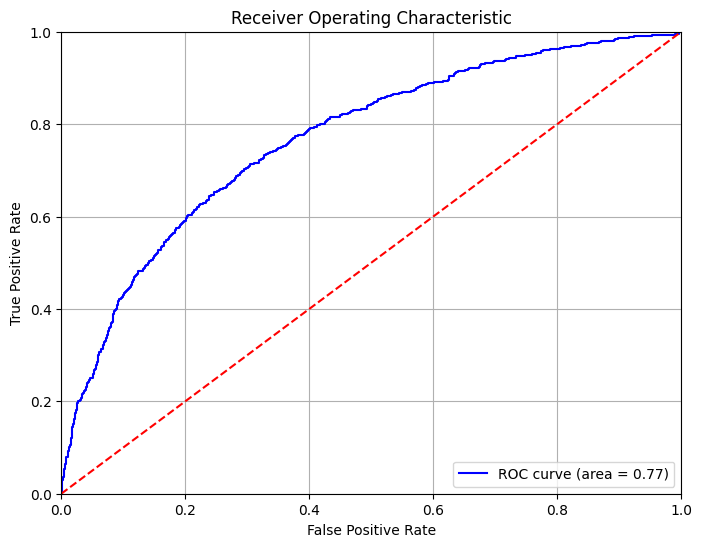


Random Forest Classifier:
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Confusion Matrix:
[[2293   86]
 [ 318  303]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.78      0.49      0.60       621

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000

Accuracy Score: 0.8653333333333333
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


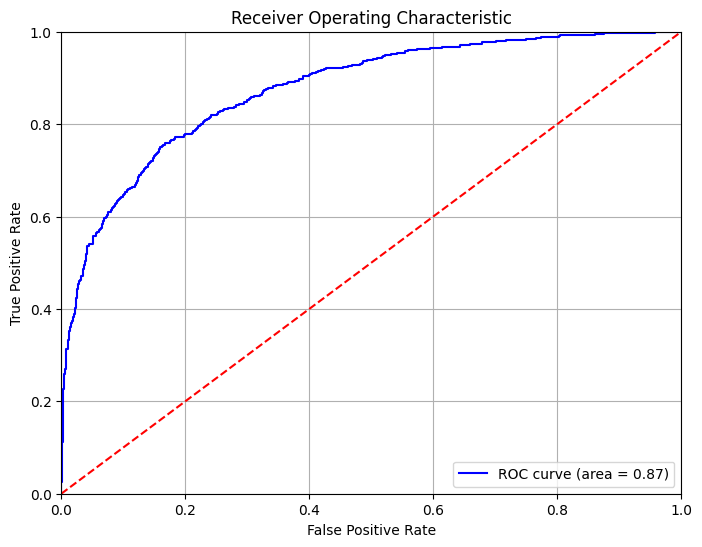


Gradient Boosting Classifier:
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Confusion Matrix:
[[2275  104]
 [ 292  329]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2379
           1       0.76      0.53      0.62       621

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy Score: 0.868
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


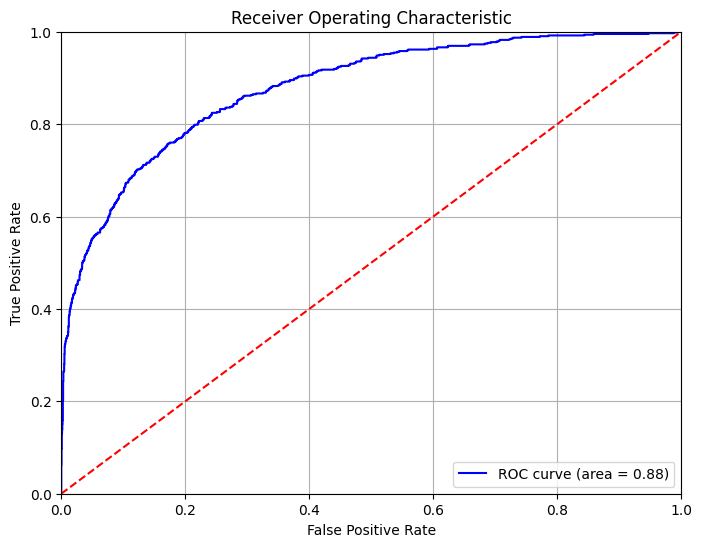


XGBoost Classifier:
Fitting 3 folds for each of 162 candidates, totalling 486 fits

Confusion Matrix:
[[2283   96]
 [ 306  315]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.77      0.51      0.61       621

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy Score: 0.866
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


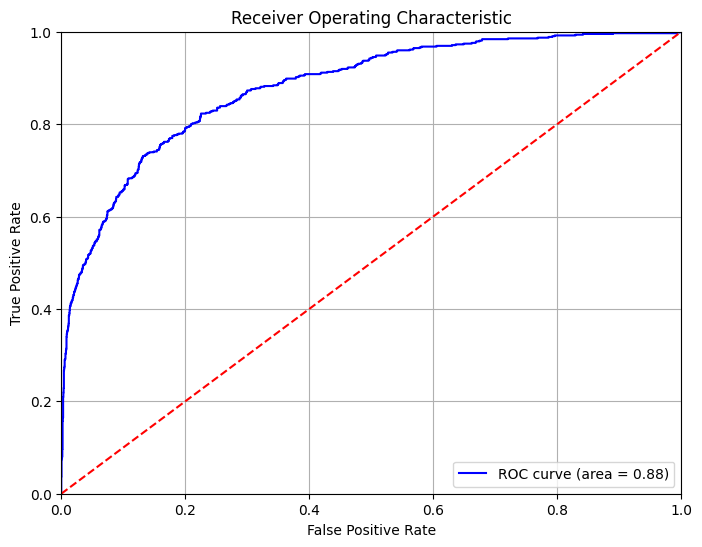

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# Loading the dataset
dataset = pd.read_csv('Bank_Customer_Churn_dataset.csv')

# Data preprocessing
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
dataset['Gender'] = dataset['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
dataset = pd.get_dummies(dataset, columns=['Geography'], drop_first=True)
dataset['NumOfProducts'] /= 4
dataset['Tenure'] /= 10
dataset['Age'] = minmax_scale(dataset['Age'])
dataset['EstimatedSalary'] = minmax_scale(dataset['EstimatedSalary'])
dataset['Balance'] = minmax_scale(dataset['Balance'])

# Splitting the data
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define a function to train and evaluate models
def evaluate_model(model, params):
    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Best Parameters:", grid_search.best_params_)

    # Plot ROC curve
    plot_roc_curve(best_model)

    return best_model

# Define a function to plot the ROC curve
def plot_roc_curve(model):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# 1. Logistic Regression
print("Logistic Regression:")
logreg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
logreg_model = LogisticRegression(max_iter=200)
evaluate_model(logreg_model, logreg_params)

# 2. Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_model = RandomForestClassifier(random_state=0)
evaluate_model(rf_model, rf_params)

# 3. Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
gbc_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gbc_model = GradientBoostingClassifier(random_state=0)
evaluate_model(gbc_model, gbc_params)


# 5. XGBoost Classifier (optimized)
print("\nXGBoost Classifier:")
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
evaluate_model(xgb_model, xgb_params)


In [ ]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve for a model
def plot_learning_curve_accuracy(model, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=3, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label="Training Accuracy")
    plt.plot(train_sizes, val_mean, 'o-', color='green', label="Validation Accuracy")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plotting learning curve for XGBoost
print("Learning Curve for XGBoost:")
xgb_model = XGBClassifier(
    objective='binary:logistic', eval_metric='logloss',
    n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8
)
plot_learning_curve_accuracy(xgb_model, "Learning Curve for XGBoost")

# Plotting learning curve for Logistic Regression
print("Learning Curve for Logistic Regression:")
logreg_model = LogisticRegression(max_iter=200, solver='liblinear', C=1)
plot_learning_curve_accuracy(logreg_model, "Learning Curve for Logistic Regression")

# Plotting learning curve for Random Forest
print("Learning Curve for Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
plot_learning_curve_accuracy(rf_model, "Learning Curve for Random Forest")

# Plotting learning curve for Gradient Boosting Classifier
print("Learning Curve for Gradient Boosting Classifier:")
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0)
plot_learning_curve_accuracy(gbc_model, "Learning Curve for Gradient Boosting Classifier")


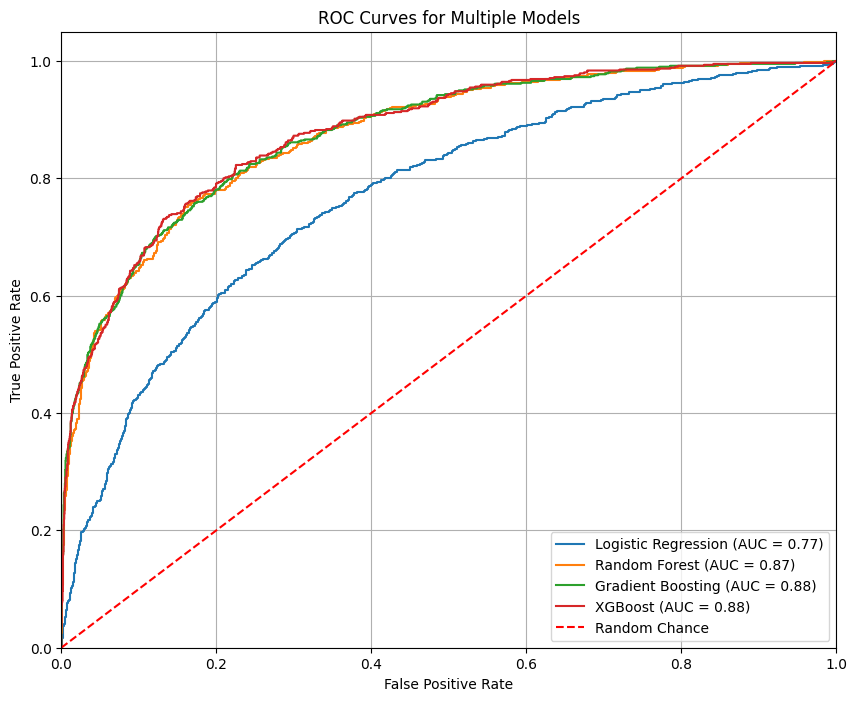

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define a function to plot ROC curves for multiple models
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():
        # Get the predicted probabilities for the positive class
        y_prob = model.predict_proba(X_test)[:, 1]
        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot the random chance line
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiple Models')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Train models and store them in a dictionary
models = {
    "Logistic Regression": LogisticRegression(C=1, solver='liblinear', max_iter=200),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, random_state=0),
    "XGBoost": XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8, eval_metric='logloss')
}

# Fit each model and plot the ROC curves
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Now plot the ROC curves for all models
plot_roc_curves(models, X_test, y_test)


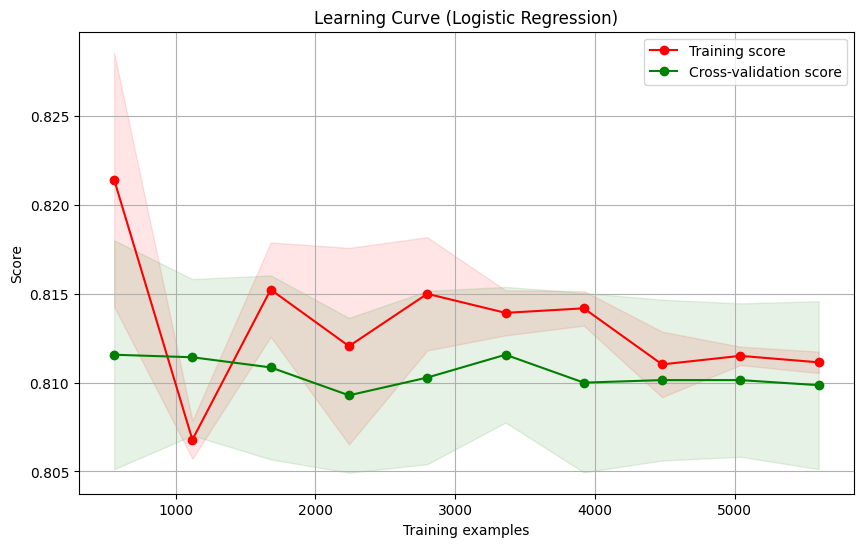

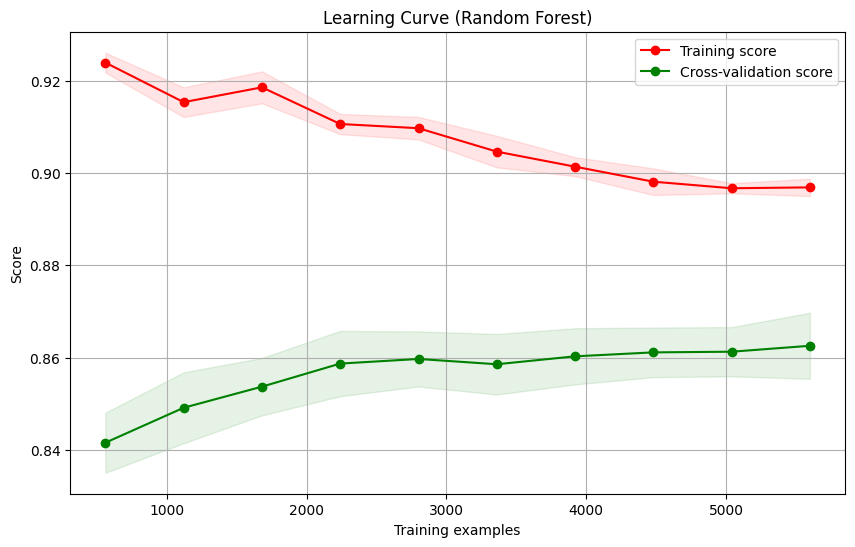

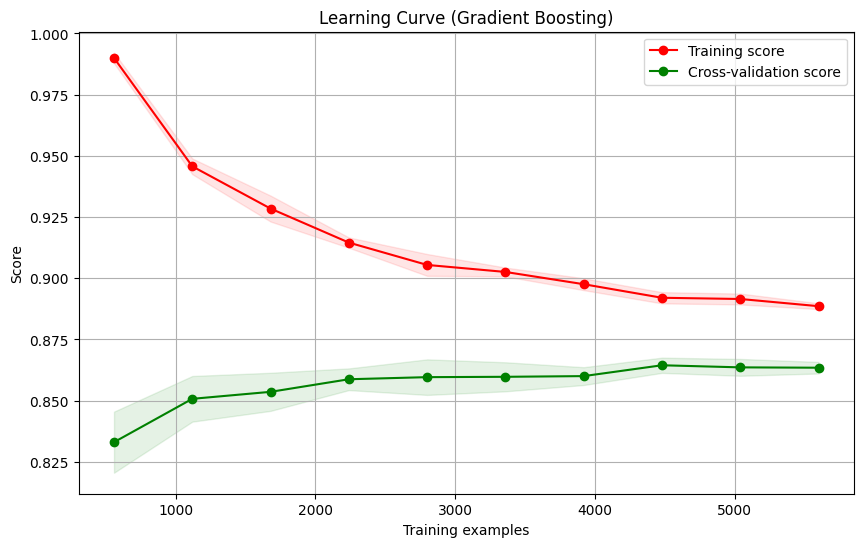

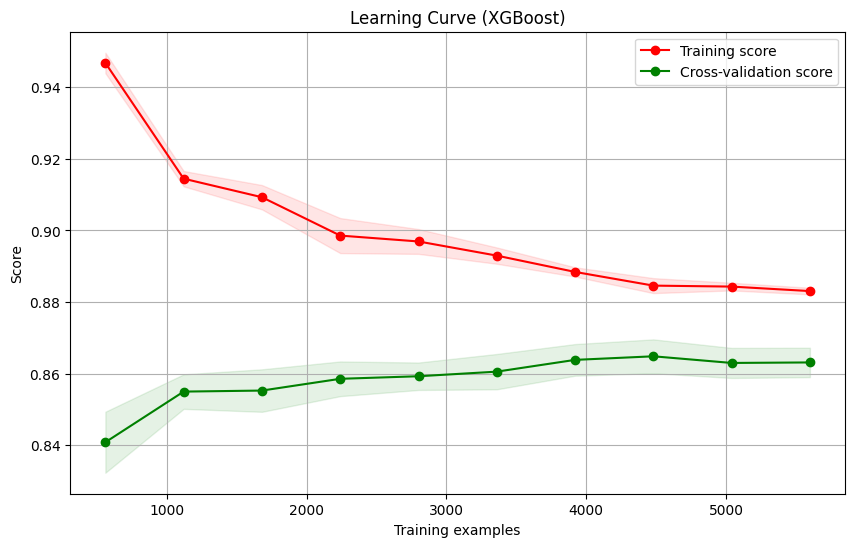

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Get learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    # Calculate mean and std deviation for both train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Plot std deviation as shaded areas
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves for each model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, colsample_bytree=0.8, subsample=0.8, eval_metric='logloss')
}

# Assuming X_train, y_train are the feature matrix and labels
for model_name, model in models.items():
    plot_learning_curve(model, f"Learning Curve ({model_name})", X_train, y_train, cv=5)


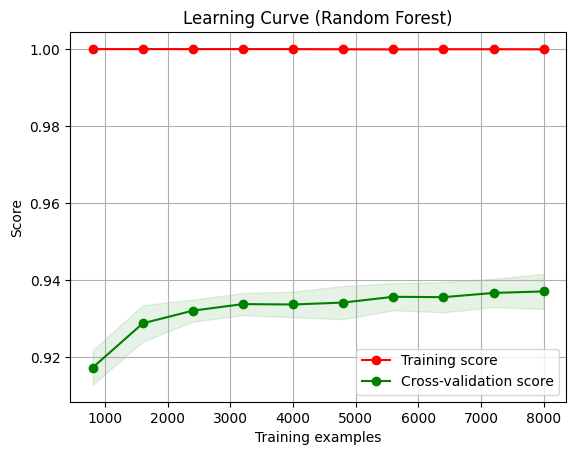

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold

# Generate a synthetic dataset or load your data here
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training score
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the cross-validation score
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


Logistic Regression:
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

<Figure size 1000x800 with 0 Axes>

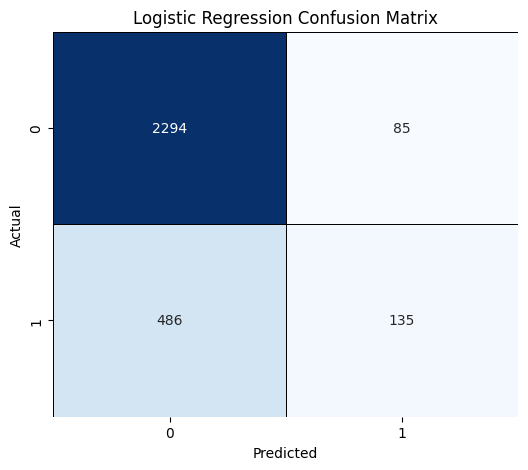


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2379
           1       0.61      0.22      0.32       621

    accuracy                           0.81      3000
   macro avg       0.72      0.59      0.61      3000
weighted avg       0.78      0.81      0.77      3000

Accuracy Score: 0.8096666666666666

Random Forest Classifier:
Fitting 3 folds for each of 36 candidates, totalling 108 fits


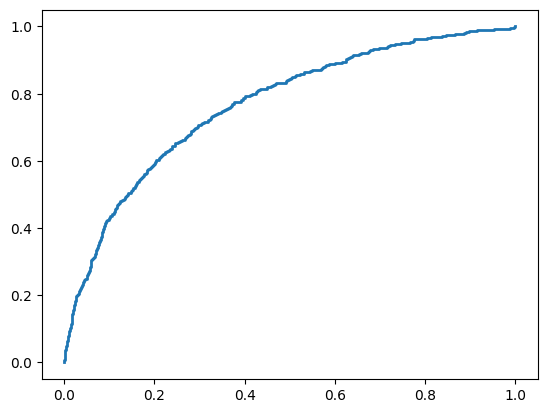

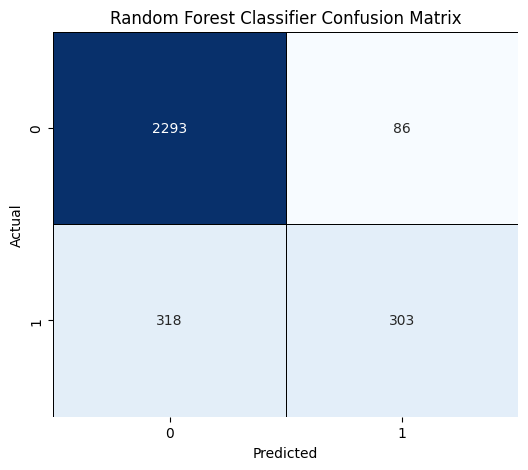


Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.78      0.49      0.60       621

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000

Accuracy Score: 0.8653333333333333

Gradient Boosting Classifier:
Fitting 3 folds for each of 27 candidates, totalling 81 fits


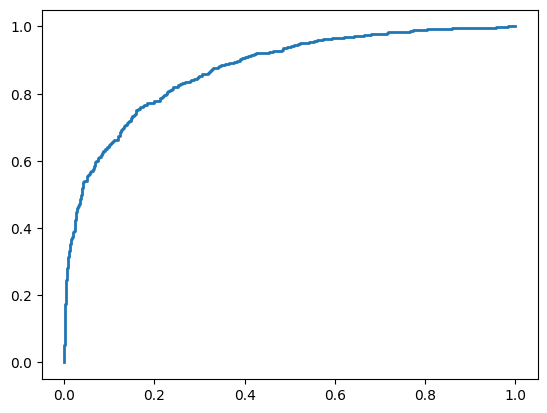

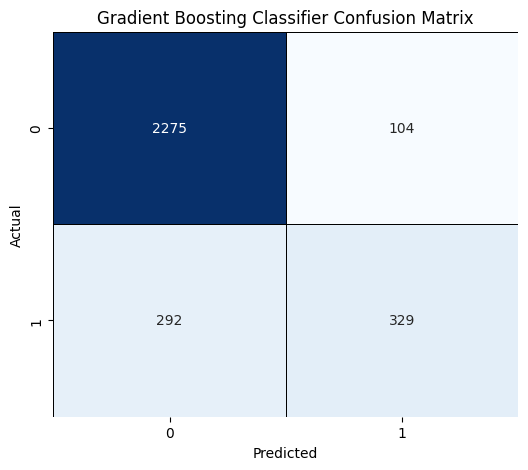


Gradient Boosting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2379
           1       0.76      0.53      0.62       621

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy Score: 0.868

K-Nearest Neighbors:
Fitting 3 folds for each of 8 candidates, totalling 24 fits


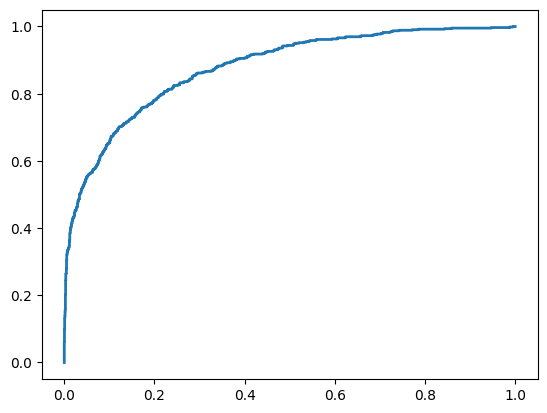

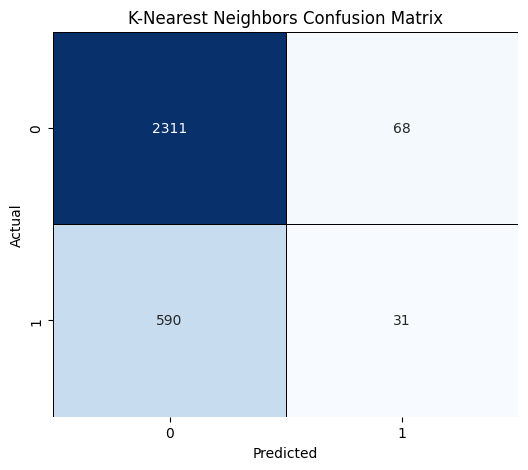


K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2379
           1       0.31      0.05      0.09       621

    accuracy                           0.78      3000
   macro avg       0.55      0.51      0.48      3000
weighted avg       0.70      0.78      0.71      3000

Accuracy Score: 0.7806666666666666

XGBoost Classifier:
Fitting 3 folds for each of 162 candidates, totalling 486 fits


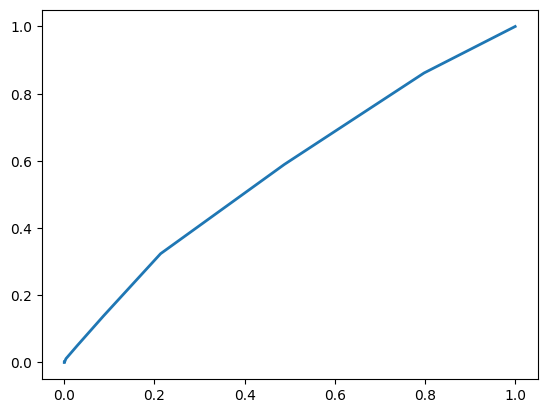

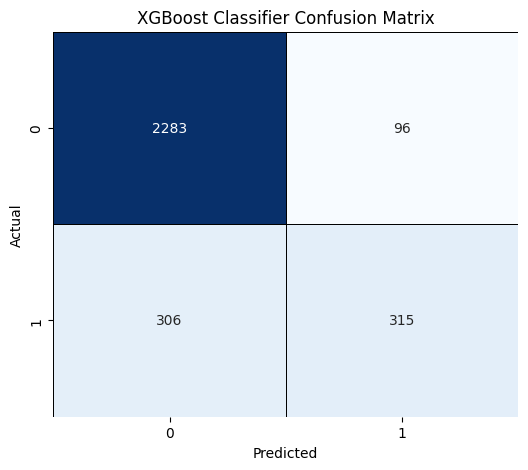


XGBoost Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.77      0.51      0.61       621

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy Score: 0.866

Support Vector Classifier:
Fitting 3 folds for each of 8 candidates, totalling 24 fits


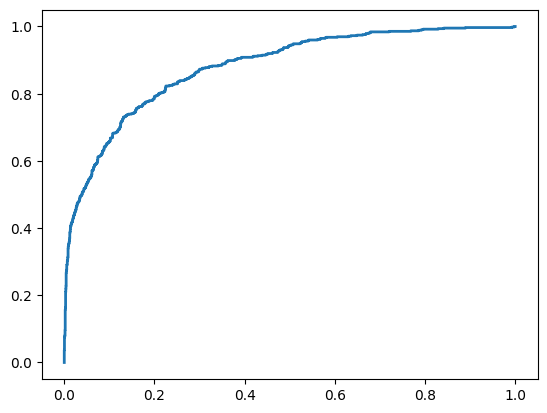

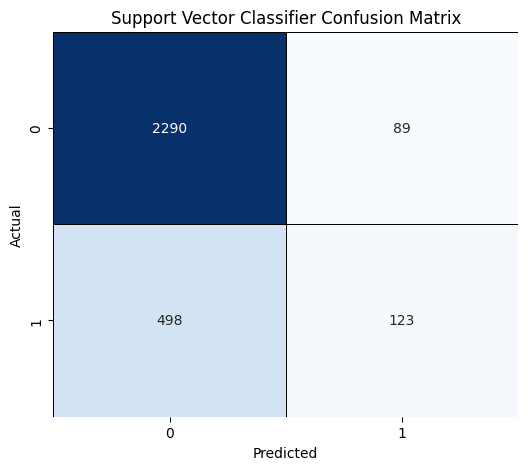


Support Vector Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2379
           1       0.58      0.20      0.30       621

    accuracy                           0.80      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.77      0.80      0.76      3000

Accuracy Score: 0.8043333333333333


NameError: name 'fpr' is not defined

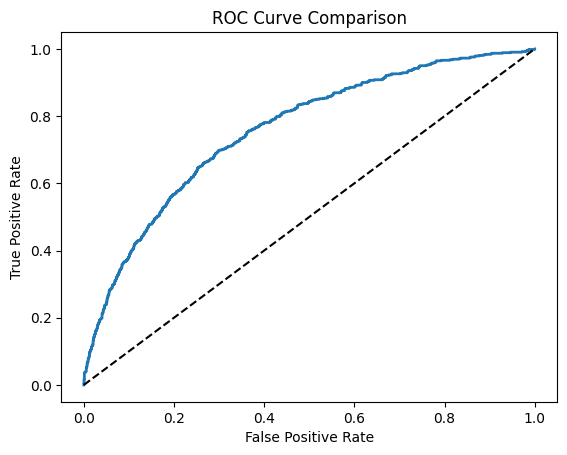

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, linewidths=0.5, linecolor='black', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# Function to evaluate and plot metrics
def evaluate_and_plot(model, params, model_name):
    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, title=f'{model_name} Confusion Matrix')

    # Classification Report
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)

    return best_model, y_pred, y_prob

# Initialize ROC plot
plt.figure(figsize=(10, 8))

# 1. Logistic Regression
print("Logistic Regression:")
logreg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
logreg_model = LogisticRegression(max_iter=200)
logreg_best_model, logreg_preds, logreg_probs = evaluate_and_plot(logreg_model, logreg_params, 'Logistic Regression')

# 2. Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_model = RandomForestClassifier(random_state=0)
rf_best_model, rf_preds, rf_probs = evaluate_and_plot(rf_model, rf_params, 'Random Forest Classifier')

# 3. Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
gbc_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gbc_model = GradientBoostingClassifier(random_state=0)
gbc_best_model, gbc_preds, gbc_probs = evaluate_and_plot(gbc_model, gbc_params, 'Gradient Boosting Classifier')

# 4. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors:")
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_model = KNeighborsClassifier()
knn_best_model, knn_preds, knn_probs = evaluate_and_plot(knn_model, knn_params, 'K-Nearest Neighbors')

# 5. XGBoost Classifier
print("\nXGBoost Classifier:")
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb_best_model, xgb_preds, xgb_probs = evaluate_and_plot(xgb_model, xgb_params, 'XGBoost Classifier')

# 6. Support Vector Classifier (SVC)
print("\nSupport Vector Classifier:")
svc_params = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_model = SVC(probability=True)
svc_best_model, svc_preds, svc_probs = evaluate_and_plot(svc_model, svc_params, 'Support Vector Classifier')

# ROC curve comparison
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Plot all ROC curves
plot_roc_curve(fpr, tpr, roc_auc, 'Logistic Regression')
plot_roc_curve(fpr, tpr, roc_auc, 'Random Forest Classifier')
plot_roc_curve(fpr, tpr, roc_auc, 'Gradient Boosting Classifier')
plot_roc_curve(fpr, tpr, roc_auc, 'K-Nearest Neighbors')
plot_roc_curve(fpr, tpr, roc_auc, 'XGBoost Classifier')
plot_roc_curve(fpr, tpr, roc_auc, 'Support Vector Classifier')

plt.legend(loc='lower right')
plt.show()

# Now comparing accuracy, precision, recall, and f1 score across all models
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN', 'XGBoost', 'SVC'],
    'Accuracy': [accuracy_score(y_test, logreg_preds), accuracy_score(y_test, rf_preds),
                 accuracy_score(y_test, gbc_preds), accuracy_score(y_test, knn_preds),
                 accuracy_score(y_test, xgb_preds), accuracy_score(y_test, svc_preds)],
    'Precision': [precision_score(y_test, logreg_preds), precision_score(y_test, rf_preds),
                  precision_score(y_test, gbc_preds), precision_score(y_test, knn_preds),
                  precision_score(y_test, xgb_preds), precision_score(y_test, svc_preds)],
    'Recall': [recall_score(y_test, logreg_preds), recall_score(y_test, rf_preds),
               recall_score(y_test, gbc_preds), recall_score(y_test, knn_preds),
               recall_score(y_test, xgb_preds), recall_score(y_test, svc_preds)],
    'F1 Score': [f1_score(y_test, logreg_preds), f1_score(y_test, rf_preds),
                 f1_score(y_test, gbc_preds), f1_score(y_test, knn_preds),
                 f1_score(y_test, xgb_preds), f1_score(y_test, svc_preds)]
}

metrics_df = pd.DataFrame(metrics)

# Plotting comparison of metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Comparison of Accuracy, Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
